In [ ]:
#import libaries
from pandas_datareader  import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock symbols/tickers in the portfolio
#FAANG
assets = ['AAPL','TM', 'TMDI']

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas as pd

# Set the start and end date
start_date = '2013-01-01'
end_date = '2022-12-12'

# Define the ticker list
tickers_list = ['AAPL','TM', 'TMDI']

# Create placeholder for data
data = pd.DataFrame(columns=tickers_list)

# Fetch the data
for ticker in tickers_list:
    data[ticker] = yf.download(ticker, start_date,end_date)['Adj Close']
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,TM,TMDI
Date,,,
2013-01-02,16.862822,85.815811,36.000000
2013-01-03,16.649984,85.261520,37.200001
2013-01-04,16.186197,87.022705,36.000000
2013-01-07,16.090988,85.404572,37.799999
2013-01-08,16.134295,83.974159,37.799999
...,...,...,...
2022-12-05,146.630005,143.190002,0.840000
2022-12-06,142.910004,141.089996,0.600000
2022-12-07,140.940002,141.860001,0.730000


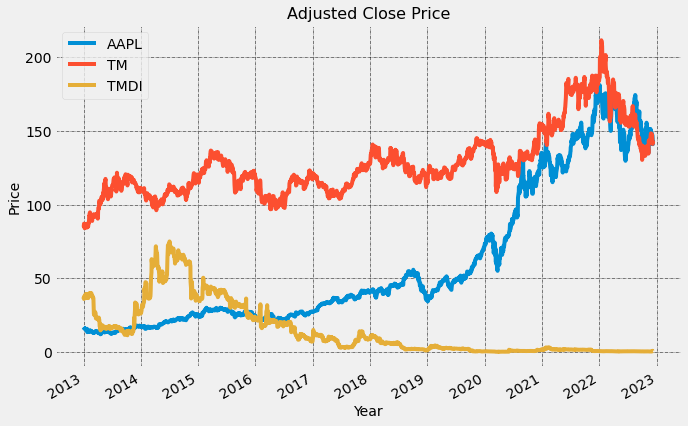

In [ ]:
data.plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [ ]:
#show the return 
returns=data.pct_change()
returns.head()

,AAPL,TM,TMDI
Date,,,
2013-01-02,NaN,NaN,NaN
2013-01-03,-0.012622,-0.006459,0.033333
2013-01-04,-0.027855,0.020656,-0.032258
2013-01-07,-0.005882,-0.018594,0.050000
2013-01-08,0.002691,-0.016749,0.000000


In [ ]:
weight_portfolio = [0.2, 0.7, 0.1] 

In [ ]:
variance_matrix = returns.cov()*252
variance_matrix

,AAPL,TM,TMDI
AAPL,0.084283,0.024228,0.028282
TM,0.024228,0.045841,0.015204
TMDI,0.028282,0.015204,3.164924


In [ ]:
# Computing portfolio variance
portfolio_variance = np.transpose(weight_portfolio)@variance_matrix@weight_portfolio

# Computing portfolio volatility (Risk) 
portfolio_volatility = np.sqrt(portfolio_variance)

print("Portfolio Variance is", portfolio_variance) 
print("Portfolio Volatility (Risk) is", portfolio_volatility)

Portfolio Variance is 0.06752630498664369
Portfolio Volatility (Risk) is 0.2598582401746069


In [ ]:
# Initialize an empty list for storing the portfolio returns 
port_returns = []

# Initialize an empty list for storing the portfolio volatility 
port_volatility = []

# Initialize an empty list for storing the portfolio weights 
port_weights = []

num_assets = len (data.columns) 
num_portfolios = 100

# Computing the individual asset return 
individual_rets = data.resample('Y').last().pct_change().mean()

In [ ]:
for port in range(num_portfolios):
    #Randomly generate weigh combination 
    weights = np.random.random(num_assets)
    # Normalize weight so that they sum to 1
    weights = weights/np.sum(weights) 
    port_weights.append(weights)
    # Returns are the dot product of individual expected returns of asset and its weights 
    returns = np.dot (weights, individual_rets)
    port_returns.append(returns)

    #Computing Portfolio Variance
    var = variance_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    #Daily standard deviation: volatility is square root of variance
    sd = np.sqrt(var) 
    
    # Annualizing the standard deviation will give us the volatility 
    ann_sd = sd*np.sqrt(250) 
    port_volatility.append(ann_sd)

In [ ]:
# Creating a dictionary of returns and volatility 
data_result = {'Returns' :port_returns, 'Volatility' :port_volatility}

for counter, symbol in enumerate (data.columns.tolist()):
    data_result[symbol+' weight'] = [w[counter] for w in port_weights]

In [ ]:
# Converting the dictionary to dataframe 
portfolios_V1 = pd.DataFrame(data_result) 
portfolios_V1.head()

In [ ]:
# Plot efficient frontier 
portfolios_V1.plot.scatter(x='Volatility', y='Returns', marker='o', color='y', s=15, alpha=0.5, grid=True, figsize=[8,8])
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Returns")

In [ ]:
# MIN VOLATILITY
# idxmin() gives us the minimum value in the column that has been specified. 
min_vol_port = portfolios_V1.iloc[portfolios_V1['Volatility'].idxmin()]
min_vol_port

In [ ]:
#Finding the optimal portfolio: Highest SHARPE RATIO
# risk factor
rf = 0.01
optimal_risky_port = portfolios_V1.iloc[((portfolios_V1['Returns']-rf)/portfolios_V1['Volatility']).idxmax()]
optimal_risky_port

In [ ]:
# Plotting optimal portfolio and minimum volatility
plt.subplots(figsize=(8, 8))
plt.scatter(portfolios_V1 [ 'Volatility'], portfolios_V1['Returns' ], marker='o', s=10, alpha=0.3, color = 'green')
plt.scatter (min_vol_port[1], min_vol_port[0], color='y', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='b', marker='*', s=500)
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Returns")